In [30]:
import tweepy
consumer_key="hmL3tbCl4Y7JgpKsDHKCpTEm9"
consumer_secret="zGJXewHINvlNE7ViTA10YuGsjZcOJamA1dgdF3V2aN0uF54zc2"
access_token="741301816361635840-p46wy3cSUEfuoozXvYNDvrfhpQjjt07"
access_token_secret="Edvzh6AN9KZdZtIClohE1K3KWPMlzY8u3rRRRxKJn8ztW"

In [31]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [32]:
api=tweepy.API(auth)
user=api.user_timeline(screen_name="realDonaldTrump")

In [33]:
tmpp=[]
tweets_for_csv =[tweet.text for tweet in user] # CSV file created  
for j in tweets_for_csv:
        tmpp.append(j)
                      

In [34]:
import numpy as nm
# Cleaning Spaces from each and every tweets
for  i in range(len(tmpp)):
     tmpp[i]=tmpp[i].replace('\n','')        

In [35]:
import re

for i in range(len(tmpp)):
    x=re.compile(r'https://t.co/*[a-zA-Z0-9]*',re.DOTALL)
    tmpp[i]=re.sub(x,'',tmpp[i])
    print(tmpp[i])

RT @RealOmarNavarro: I love @realDonaldTrump. He’s the only President in my lifetime who stands for our country.
RT @OliverMcGee: Retweet @POTUS isn't RACIST when @Prince wrote @realDonaldTrump Black Version! 😆Donald Trump: Black VersionMaybe that's…
RT @OliverMcGee: Retweet The Lies, False Facts &amp; Fake News of @CNN's @Acosta on @POTUS!Raise Your Hand if you LOVE @realDonaldTrump has S…
RT @OliverMcGee: Wow. Throwback to when Senator Barack Obama agreed with @realDonaldTrump on immigration! RT this so your friends see this!…
RT @TVNewsHQ: WATCH: “MSNBC is rewarding hate-filled conspiracy theorists with air time because their Trump Derangement Syndrome demands it…
RT @MariaBartiromo: Trump rarely uses racial categories. It is the media and Democratic leaders who routinely issue race-based denunciation…
The New York Times will be out of business soon after I leave office, hopefully in 6 years. They have Zero credibil… 
Thank you @TedCruz, I couldn’t agree more! 
House Democrats want 

In [36]:
for i in range(len(tmpp)):
    tmpp[i]=re.sub(r'@[a-zA-Z_.0-9]*| #[a-zA-Z0-9]*','',tmpp[i])
    print(tmpp[i])

RT : I love  He’s the only President in my lifetime who stands for our country.
RT : Retweet  isn't RACIST when  wrote  Black Version! 😆Donald Trump: Black VersionMaybe that's…
RT : Retweet The Lies, False Facts &amp; Fake News of 's  on !Raise Your Hand if you LOVE  has S…
RT : Wow. Throwback to when Senator Barack Obama agreed with  on immigration! RT this so your friends see this!…
RT : WATCH: “MSNBC is rewarding hate-filled conspiracy theorists with air time because their Trump Derangement Syndrome demands it…
RT : Trump rarely uses racial categories. It is the media and Democratic leaders who routinely issue race-based denunciation…
The New York Times will be out of business soon after I leave office, hopefully in 6 years. They have Zero credibil… 
Thank you , I couldn’t agree more! 
House Democrats want to take action against Israel because it is fighting back against two (maybe four) people that… 
Our economy is the best in the world, by far. Lowest unemployment ever within almo

In [37]:
from textblob import TextBlob

In [38]:
po=[]
for i in range(len(tmpp)):
    analysis=TextBlob(tmpp[i])
    po.append(analysis.sentiment.polarity)
    print(po[i],tmpp[i])

0.25 RT : I love  He’s the only President in my lifetime who stands for our country.
-0.1875 RT : Retweet  isn't RACIST when  wrote  Black Version! 😆Donald Trump: Black VersionMaybe that's…
-0.17500000000000004 RT : Retweet The Lies, False Facts &amp; Fake News of 's  on !Raise Your Hand if you LOVE  has S…
0.125 RT : Wow. Throwback to when Senator Barack Obama agreed with  on immigration! RT this so your friends see this!…
0.5 RT : WATCH: “MSNBC is rewarding hate-filled conspiracy theorists with air time because their Trump Derangement Syndrome demands it…
0.3 RT : Trump rarely uses racial categories. It is the media and Democratic leaders who routinely issue race-based denunciation…
0.13636363636363635 The New York Times will be out of business soon after I leave office, hopefully in 6 years. They have Zero credibil… 
0.625 Thank you , I couldn’t agree more! 
0.05 House Democrats want to take action against Israel because it is fighting back against two (maybe four) people that… 
0.5

In [39]:
import pandas as pd
sentiment=pd.DataFrame(po,columns=["Polarity"])

In [40]:
senti=pd.DataFrame({'pol':po,'Tweets':tmpp},columns=["pol","Tweets"])
senti.head()

,pol,Tweets
0,0.2500,RT : I love He’s the only President in my lif...
1,-0.1875,RT : Retweet isn't RACIST when wrote Black ...
2,-0.1750,"RT : Retweet The Lies, False Facts &amp; Fake ..."
3,0.1250,RT : Wow. Throwback to when Senator Barack Oba...
4,0.5000,RT : WATCH: “MSNBC is rewarding hate-filled co...


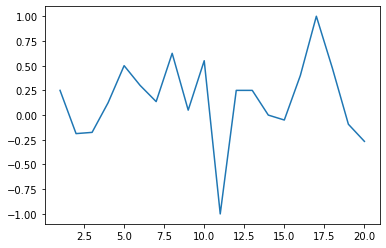

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
x_axis=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis, senti.pol)
plt.show()